In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
import math

In [2]:
food_data = pd.read_csv('food-consumption.csv')
print("Original data has the row number of", len(food_data))

food_data = food_data.dropna()
print("After removing NaN rows, data has the row number of", len(food_data))

display(food_data)

Original data has the row number of 16
After removing NaN rows, data has the row number of 13


,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [3]:
countries = food_data['Country']

X_raw = food_data.iloc[:,1:].copy().values
print("X_raw:", X_raw.shape)

# normalize data
stdA = np.std(X_raw,axis = 0)
#Here stdA vector is normalized to have a norm of 1.
stdA = skpp.normalize(stdA.reshape(1,-1)) 
#print(np.linalg.norm(stdA))

#X_raw 20 features are normalized. Ensure that each feature has the same scale of variance.  
X_raw = X_raw @ np.diag(np.ones(stdA.shape[1])/stdA[0])

X = X_raw.T

mu = np.mean(X,axis = 1)
xc = X - mu[:,None]

print("xc:", xc.shape)

C = np.dot(xc,xc.T)/xc.shape[1]
print("C:",C.shape)

X_raw: (13, 20)
xc: (20, 13)
C: (20, 20)


/Users/Andrew/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/Andrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/Users/Andrew/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


(-1.7619670643928211,
 2.8496853616650846,
 -2.508773443354454,
 2.1028789827034515)

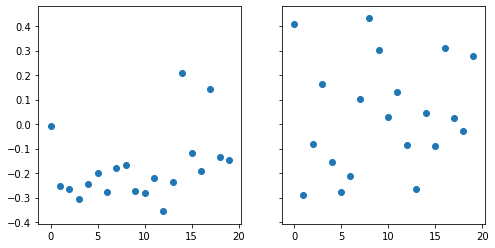

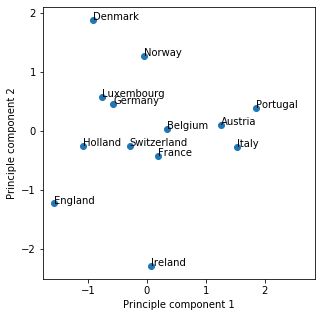

In [4]:
# PCA
K = 2
#Lock the initialization v0
S,W = ll.eigs(C,k = K,v0 = np.ones(20))

#print(W)
fig, axs = plt.subplots(1, K, sharex=True, sharey=True, figsize=(4*K, 4))
for k in range(K):
    axs[k].scatter(np.arange(20), W[:,k])

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0])
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1])

dim1 = dim1.real
dim2 = dim2.real

fig = plt.figure(figsize=(5, 5))
plt.scatter(dim1, dim2)
for x, y, label in zip(dim1, dim2, countries):
    plt.annotate(label, xy=(x, y))
ax = plt.gca()
ax.set(xlabel = "Principle component 1", ylabel = "Principle component 2")
ax.axis('square')